In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

In [2]:
DIRECTORY = r'C:\Users\taha\Desktop\Projets\Cat Vs Dog Prediction, Convolution Neural Networks\dogscats'
CATEGORIES = ['cat', 'dog']

In [3]:
IMG_SIZE = 100

data = []

for category in CATEGORIES:
    folder = os.path.join(DIRECTORY, category)
    label = CATEGORIES.index(category)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        img_arr = cv2.imread(img_path)
        img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
        data.append([img_arr, label])

In [4]:
random.shuffle(data)  # mélanger la dataset

In [5]:
X = []
y = []

for features, labels in data:
    X.append(features)
    y.append(labels)

X = np.array(X)
y = np.array(y)

In [6]:
X.max()

255

In [7]:
X = X/255   # normalisation Min-Max

In [8]:
X.shape

(23000, 100, 100, 3)

In [9]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(BatchNormalization())      # Résoudre le problème d'overfitting
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(BatchNormalization())      # Résoudre le problème d'overfitting
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(BatchNormalization())      # Résoudre le problème d'overfitting
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

#model.add(Dense(128, input_shape = X.shape[1:], activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))     # Résoudre le problème d'overfitting

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))    # Résoudre le problème d'overfitting

#model.add(Dense(2, activation = 'softmax'))
model.add(Dense(2, activation = 'sigmoid'))

In [10]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [11]:
model_fit = model.fit(X, y, epochs=10, validation_split=0.1)

Epoch 1/10
647/647 [==============================] - 577s 887ms/step - loss: 0.6710 - accuracy: 0.6553 - val_loss: 0.6677 - val_accuracy: 0.6261
Epoch 2/10
647/647 [==============================] - 554s 856ms/step - loss: 0.4688 - accuracy: 0.7802 - val_loss: 0.5058 - val_accuracy: 0.7496
Epoch 3/10
647/647 [==============================] - 552s 853ms/step - loss: 0.3795 - accuracy: 0.8313 - val_loss: 0.3948 - val_accuracy: 0.8330
Epoch 4/10
647/647 [==============================] - 551s 852ms/step - loss: 0.3123 - accuracy: 0.8653 - val_loss: 0.5936 - val_accuracy: 0.6996
Epoch 5/10
647/647 [==============================] - 541s 836ms/step - loss: 0.2369 - accuracy: 0.9005 - val_loss: 0.6467 - val_accuracy: 0.7952
Epoch 6/10
647/647 [==============================] - 579s 895ms/step - loss: 0.1681 - accuracy: 0.9318 - val_loss: 0.3741 - val_accuracy: 0.8343
Epoch 7/10
647/647 [==============================] - 577s 892ms/step - loss: 0.1222 - accuracy: 0.9530 - val_loss: 0.4121 -

In [12]:
model_fit.history['accuracy']

[0.6552656888961792,
 0.7802415490150452,
 0.8313043713569641,
 0.8652657270431519,
 0.9005314111709595,
 0.9318357706069946,
 0.9529951810836792,
 0.9678744077682495,
 0.9761835932731628,
 0.97826087474823]

In [13]:
model_fit.history['val_accuracy']

[0.626086950302124,
 0.7495652437210083,
 0.8330434560775757,
 0.6995652318000793,
 0.7952173948287964,
 0.8343478441238403,
 0.8460869789123535,
 0.8256521821022034,
 0.8399999737739563,
 0.8626086711883545]

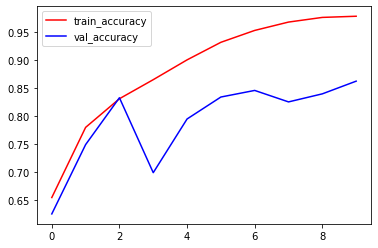

In [14]:
plt.plot(model_fit.history['accuracy'], color='red', label='train_accuracy')
plt.plot(model_fit.history['val_accuracy'], color='blue', label='val_accuracy')
plt.legend()
plt.show()

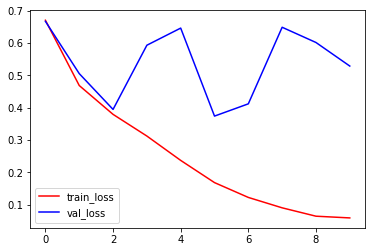

In [15]:
plt.plot(model_fit.history['loss'], color='red', label='train_loss')
plt.plot(model_fit.history['val_loss'], color='blue', label='val_loss')
plt.legend()
plt.show()

## Tester le modèle :

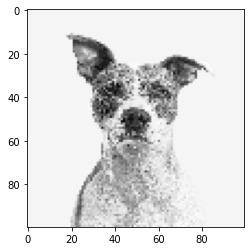

In [16]:
test_img_dog = cv2.imread(r'C:\Users\taha\Desktop\Projets\Cat Vs Dog Prediction, Convolution Neural Networks\test_images\img_dog2.jpg')
test_img_dog = cv2.resize(test_img_dog, (IMG_SIZE,IMG_SIZE))
plt.imshow(test_img_dog)

In [17]:
test_input_dog = test_img_dog.reshape((1,IMG_SIZE,IMG_SIZE,3))

model.predict(test_input_dog)
model_prediction = np.argmax(model.predict(test_input_dog))
model_prediction

1/1 [==============================] - 0s 50ms/step


1

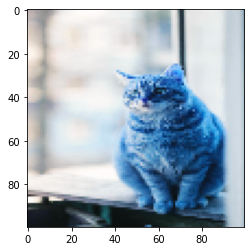

In [18]:
test_img_cat = cv2.imread(r'C:\Users\taha\Desktop\Projets\Cat Vs Dog Prediction, Convolution Neural Networks\test_images\img_cat2.jpg')
test_img_cat = cv2.resize(test_img_cat, (IMG_SIZE,IMG_SIZE))
plt.imshow(test_img_cat)

In [19]:
test_input_cat = test_img_cat.reshape((1,IMG_SIZE,IMG_SIZE,3))

model.predict(test_input_cat)
model_prediction = np.argmax(model.predict(test_input_cat))
model_prediction

1/1 [==============================] - 0s 50ms/step


0